<a href="https://colab.research.google.com/github/x1001000/TFGAI/blob/master/TFGAI-1st-final/cifar10_part1_training_on_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data

1. 資料都是數據化的多維陣列  
資料常要視覺化以幫助理解

2. 匯入多維陣列運算要用的函式庫 numpy，以下簡稱為 np  
匯入作圖要用的函式庫 matplotlib.pyplot，以下簡稱為 plt

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

3. [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) 資料集有10類各6000張32x32的彩圖，預先被切成50000筆訓練圖片及其類別，和10000筆測試圖片及其類別

4. x aka feature, image 32x32x3 in this case  
y aka label, classification 0~9 in this case

5. x 是四維陣列，陣列中有50000/10000個三維(三個數字)陣列  
y 是二維陣列，陣列中有50000/10000個一維(一個數字)陣列，一維陣列又稱向量，而這個向量是個一維(數字為1)向量，就是包含一個純量的向量

In [ ]:
from keras.datasets import cifar10
#data = cifar10.load_data()
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

Using TensorFlow backend.


170500096/170498071 [==============================] - 9s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


6. 準備一個字典，方便將類別的數字翻成英文

In [ ]:
thing = {0:"airplane", 1:"automobile", 2:"bird", 3:"cat", 4:"deer", 5:"dog", 6:"frog", 7:"horse", 8:"ship", 9:"truck"}

7. 看一下 training data 的 5566~5571 筆的圖片及其類別

8. 5566可以換個數字試試

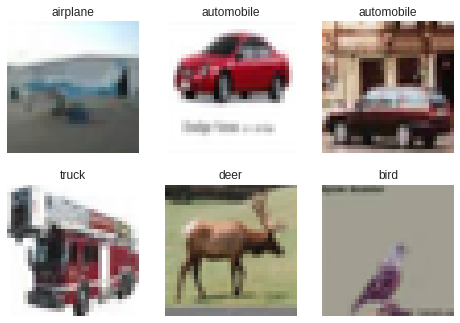

In [ ]:
for i in range(6):
  ax = plt.subplot(2, 3, 1+i)
  ax.imshow(x_train[5566+i])
  ax.set_title(thing[y_train[5566+i][0]])
  ax.set_xticks([])
  ax.set_yticks([])

# Normalization

9. training data 的第5566筆的第0列的第0~31個像素的RGB值

In [ ]:
x_train[5566, 0, :, :]

array([[253, 253, 253],
       [253, 253, 253],
       [254, 254, 254],
       [254, 254, 254],
       [254, 254, 254],
       [253, 253, 253],
       [252, 252, 252],
       [251, 251, 251],
       [251, 251, 251],
       [252, 251, 251],
       [251, 252, 252],
       [246, 254, 253],
       [243, 253, 252],
       [241, 253, 251],
       [239, 253, 250],
       [237, 252, 249],
       [234, 252, 250],
       [231, 253, 254],
       [229, 253, 254],
       [226, 252, 253],
       [222, 251, 252],
       [220, 251, 250],
       [218, 249, 250],
       [214, 245, 250],
       [210, 241, 249],
       [207, 237, 250],
       [205, 234, 251],
       [201, 230, 251],
       [198, 228, 249],
       [196, 227, 246],
       [192, 224, 243],
       [190, 221, 240]], dtype=uint8)

10. Normalization就是把0~255變成0~1

In [ ]:
x_train = x_train/255
x_test = x_test/255

11. Normalized training data 的第5566筆的第0列的第0~31個像素的RGB值

In [ ]:
x_train[5566, 0, :, :]

array([[0.99215686, 0.99215686, 0.99215686],
       [0.99215686, 0.99215686, 0.99215686],
       [0.99607843, 0.99607843, 0.99607843],
       [0.99607843, 0.99607843, 0.99607843],
       [0.99607843, 0.99607843, 0.99607843],
       [0.99215686, 0.99215686, 0.99215686],
       [0.98823529, 0.98823529, 0.98823529],
       [0.98431373, 0.98431373, 0.98431373],
       [0.98431373, 0.98431373, 0.98431373],
       [0.98823529, 0.98431373, 0.98431373],
       [0.98431373, 0.98823529, 0.98823529],
       [0.96470588, 0.99607843, 0.99215686],
       [0.95294118, 0.99215686, 0.98823529],
       [0.94509804, 0.99215686, 0.98431373],
       [0.9372549 , 0.99215686, 0.98039216],
       [0.92941176, 0.98823529, 0.97647059],
       [0.91764706, 0.98823529, 0.98039216],
       [0.90588235, 0.99215686, 0.99607843],
       [0.89803922, 0.99215686, 0.99607843],
       [0.88627451, 0.98823529, 0.99215686],
       [0.87058824, 0.98431373, 0.98823529],
       [0.8627451 , 0.98431373, 0.98039216],
       [0.

# One-hot encoding

12. training data 的第0筆是個一維向量(一對中括號間有一個數字)

In [ ]:
y_train[0]

array([6], dtype=uint8)

13. 獨熱編碼就是把一維向量變成獨熱的N維向量(一對中括號間有N個數字，只有一個是1，其他是0)

In [ ]:
from keras.utils import np_utils
y_train_onehot = np_utils.to_categorical(y_train)
y_test_onehot = np_utils.to_categorical(y_test)

14. 獨熱編碼的 training data 的第0筆是個10維向量(一對中括號間有10個數字)

In [ ]:
y_train_onehot[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

# Model

15. 初學者用高階的Keras函式庫(之後再用TensorFlow函式庫)  
初學者用順序式模型(之後再用函數式模型)

In [ ]:
from keras.models import Sequential
model = Sequential()

16. 匯入要用的神經網路層

17. 卷積層 => 池化層 => 卷積層 => 池化層 => 卷積層 => 池化層 => 攤平層 => 全連接層 => 全連接層  
放棄層藉由隨機放棄更新一部份神經元，避免模型過度擬合(overfitting)訓練資料，反而降低理解力  
試試註解掉放棄層，看看有何不同

18. 層就是一排神經元，輸入上一層的輸出

19. 卷積層建構函數的引數：  
filters是濾鏡組數，就是特徵圖數，就是神經元數，就是線性函數的個數  
kernel_size是濾鏡的形狀，Conv2D的kernel_size就會是2D的  
padding='same'，讓卷積結果圖不會小一圈  
input_shape是輸入這一層眾神經元們的陣列形狀，只有第一層要填  
activation='relu'，relu是REctified Linear Unit的縮寫，y=f(x)=max(0,x)，y等於0和x中較大者，換句話說，當x>0時y等於x，否則y等於0

20. 池化層建構函數的引數：  
pool_size就是從多大的池子取一個值，池化目的是壓縮資料量

21. 放棄層建構函數的引數：  
rate就是隨機放棄更新的比例

22. 攤平層把上一層輸出的所有特徵圖像素排成一直線，以便銜接全連接層，再銜接至降至10個神經元的全連接層，輸出10維向量

23. 輸出層的activation='softmax'，使10個輸出值的和，為機率的和，為1

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 padding='same',
                 input_shape=(32,32,3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.25))

model.add(Dense(10, activation='softmax'))

24. 列印神經網路架構

25. 模型參數Param個數：  
( 3x3濾鏡形狀 x 3面RGB + 1個bias ) x 32面特徵圖 = 896  
( 3x3濾鏡形狀 x 32面特徵圖 + 1個bias ) x 64面特徵圖 = 18496  
( 3x3濾鏡形狀 x 64面特徵圖 + 1個bias ) x 128面特徵圖 = 73856  
( 2048個輸入 + 1個bias ) x 512個神經元 = 1049088  
( 512個輸入 + 1個bias ) x 10個神經元 = 5130

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         73856     
__________

# Train

26. [Before training a model, you need to configure the learning process, which is done via the compile method. It receives three arguments:](https://keras.io/getting-started/sequential-model-guide/)
>1. loss='categorical_crossentropy'，針對分類問題的loss算法
>2. optimizer='adam'，[Adam — latest trends in deep learning optimization](https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c)  
>3. metrics=['accuracy']，訓練過程顯示準確率

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

27. 用訓練資料的feature(x_train)和label(y_train)讓模型去學習(fit)  
batch_size = 學習(更新Param)一波的樣本數  
epochs = 學習訓練資料全部樣本的回合數  
validation_split = 切多少比例的訓練資料，不做訓練，做驗證

In [ ]:
learning = model.fit(x_train,
                     y_train_onehot,
                     batch_size=128,
                     epochs=20,
                     validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 13s 336us/step - loss: 1.6934 - acc: 0.3787 - val_loss: 1.3531 - val_acc: 0.5242
Epoch 2/20
40000/40000 [==============================] - 9s 228us/step - loss: 1.2846 - acc: 0.5408 - val_loss: 1.1291 - val_acc: 0.6062
Epoch 3/20
40000/40000 [==============================] - 9s 229us/step - loss: 1.1153 - acc: 0.6023 - val_loss: 0.9813 - val_acc: 0.6553
Epoch 4/20
40000/40000 [==============================] - 9s 228us/step - loss: 1.0032 - acc: 0.6451 - val_loss: 0.8939 - val_acc: 0.6892
Epoch 5/20
40000/40000 [==============================] - 9s 226us/step - loss: 0.9330 - acc: 0.6724 - val_loss: 0.8816 - val_acc: 0.6945
Epoch 6/20
40000/40000 [==============================] - 9s 227us/step - loss: 0.8754 - acc: 0.6934 - val_loss: 0.8052 - val_acc: 0.7208
Epoch 7/20
40000/40000 [==============================] - 9s 227us/step - loss: 0.8171 - acc: 0.7110 - val_loss: 0.7810 -

28. 畫出學習歷程的模型推論準確率  
藍色曲線是模型對訓練資料的推論準確率  
綠色曲線是模型對驗證資料的推論準確率  
約在第10學習週期開始過度擬合

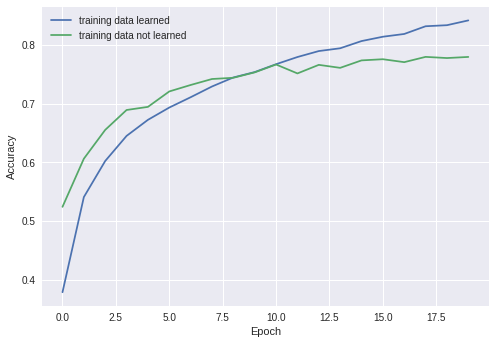

In [ ]:
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(learning.history['acc'])
plt.plot(learning.history['val_acc'])
plt.legend(['training data learned', 'training data not learned'])

29. 最後的模型推論準確率

In [ ]:
learning.history['val_acc'][-1]

0.7796

30. 用model.evaluate函數評估模型對10000筆測試資料的推論準確率，約略同上

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test_onehot)
accuracy

10000/10000 [==============================] - 1s 133us/step


0.7744

# Inference

31. 以模型對測試資料取得推論為例  
用model.predict函數取得推論，為10000筆10維向量  
用model.predict_classes取得推論，為10000筆純量  
查看第0筆的獨熱編碼及其類別是一致的

In [ ]:
prediction = model.predict(x_test)
classification = model.predict_classes(x_test)
print(prediction.shape)
print(classification.shape)
print(prediction[0])
print(classification[0])

(10000, 10)
(10000,)
[1.7070312e-02 5.4837577e-03 7.8360259e-04 7.5729650e-01 4.2174882e-04
 1.6835628e-01 1.5961150e-02 3.0863092e-03 4.3150582e-03 2.7225273e-02]
3


32. 任意看15張圖的推論結果正確與否

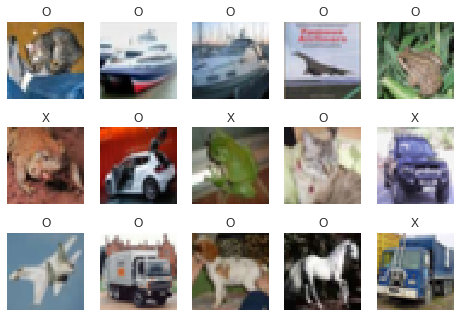

In [ ]:
for i in range(15):
  ax = plt.subplot(3, 5, 1+i)
  ax.imshow(x_test[i])
  ax.set_title('O' if classification[5566+i] == y_test[5566+i][0] else 'X')
  ax.set_xticks([])
  ax.set_yticks([])

# Save

33. Save model to a JSON file

In [ ]:
!ls
model_json = model.to_json()
with open('cifar10_model.json', 'w') as f:
  f.write(model_json)
!ls

sample_data
cifar10_model.json  sample_data


34. Save params to a H5 file

In [ ]:
!ls
model.save_weights('cifar10_params.h5')
!ls

cifar10_model.json  sample_data
cifar10_model.json  cifar10_params.h5  sample_data


35. Save params+model to a H5 file

In [ ]:
!ls
model.save('cifar10_params_model.h5')
!ls

cifar10_model.json  cifar10_params.h5  sample_data
cifar10_model.json  cifar10_params.h5  cifar10_params_model.h5	sample_data


# Download to local drive

36. Colab runtime 和 Chrome 斷線一段時間會被重置，儲存在 Colab runtime 中的檔案不會被保留，而這個 ipynb(IPython/Jupyter Notebook) 還是會存在你的雲端硬碟上
37. 點開左側面板，點到Files，在此介面操作檔案的上傳及下載
38. 也可以用 google.colab 的 files.upload() 和 files.download()

In [ ]:
from google.colab import files
files.download('cifar10_params_model.h5')

# Download to Google Drive

39. Colab runtime 可以掛載 Google Drive 為一個目錄

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


40. 將要存下來的檔案備份在gdrive/My Drive目錄，即使runtime被重置，檔案還是會存在你的雲端硬碟上

In [ ]:
!cp cifar10* gdrive/My\ Drive